# Attention Mechanism

In [3]:
import matplotlib.pyplot as plt
import numpy as np


In [1]:
s1 = "Lakers lost from Celtics because they were too strong"
s2 = "Lakers lost from Celtics because they were too weak"

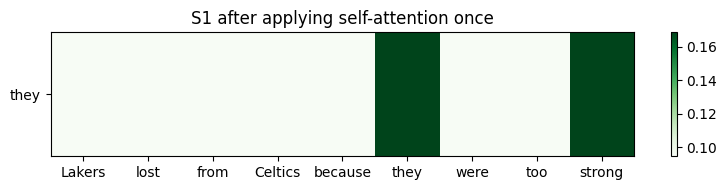

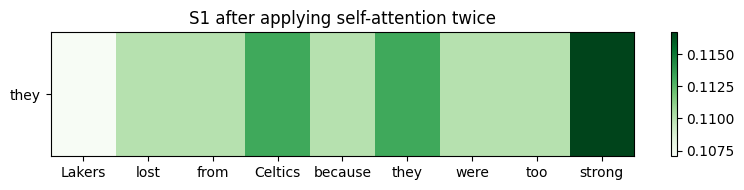

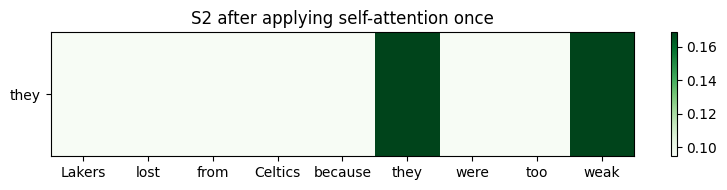

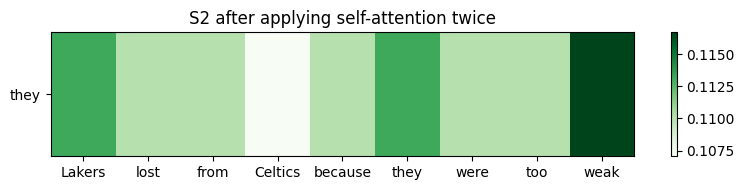

In [4]:
np.random.seed(1)
plt.rcParams["figure.figsize"] = 8, 2

xaxis = np.array(range(0, 9))
first, last, step = xaxis[0], xaxis[-1], xaxis[1] - xaxis[0]
extent = [first - step / 2.0, last + step / 2.0, 0, 1]

s1 = "Lakers lost from Celtics because they were too strong".split()
s2 = "Lakers lost from Celtics because they were too weak".split()
encoding_1 = np.array(
    [
        [1, 0, 0, -1, 0, 0, 0, 0, -1],
        [0, 0, 0, 0, 0, 1, 0, 0, 1],
    ]
)  # 2x9
encoding_2 = np.array(
    [
        [1, 0, 0, -1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 1],
    ]
)  # 2x9

Wk = np.array([[1, 0], [0, 1], [0, 0]])  # 3x2
Wq = np.array([[1, 0], [0, 1], [0, 0]])  # 3x2
Wv = np.array([[1, 0], [0, 1]])  # 2x2


def softmax(x, axis=0):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=axis)


def attend(encoding):
    # FILL IN: multiply the right matrices to calculate the attention weights and output (after softmax)
    # Tip: to multiply two matrices, you can use "@". E.g.,
    # a = np.array([[1,0],[2,0])
    # b = np.array([[1,0],[1,1])
    # c = a @ b

    k = Wk @ encoding  # 3x2 x 2x9 = 3x9
    q = Wq @ encoding  # 3x2 x 2x9 = 3x9
    v = Wv @ encoding  # 2x2 x 2x9 = 2x9
    scaler = np.sqrt(Wq.shape[0])
    attention_weights = softmax((k.transpose() @ q) / scaler)  # 9x3 x 3x9 = 9x9
    attention_output = v @ attention_weights  # 2x9 x 9x9 = 2x9
    return attention_weights, attention_output


def colormap(attention_weights, words, title):
    plt.imshow(attention_weights[np.newaxis, :], cmap="Greens", aspect="auto", extent=extent)
    plt.xticks(xaxis, words)
    plt.yticks([0.5], ["they"])
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.show()


# 5 is the index of the word "they", which want to plot when it's the query
they_idx = 5

for idx, (sentence, encoding) in enumerate(zip((s1, s2), (encoding_1, encoding_2))):
    attention_weights_1, attended_values_1 = attend(encoding)
    attention_weights_2, attended_values_2 = attend(attended_values_1)

    colormap(
        attention_weights_1[:, they_idx],
        sentence,
        f"S{idx + 1} after applying self-attention once",
    )
    colormap(
        attention_weights_2[:, they_idx],
        sentence,
        f"S{idx + 1} after applying self-attention twice",
    )